# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Reygen Win Japar]
- **Email:** [reygenwin26@gmail.com]
- **ID Dicoding:** [reygen_win]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda sepanjang hari? (Apakah ada jam-jam sibuk?)
- Bagaimana faktor musim memengaruhi jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit

## Data Wrangling

### Gathering Data

In [40]:
# Day Data
file_id = '1xRdfGYqrr4zCa-NoNw8w_vM44XZatvJn'
download_url = f"https://drive.google.com/uc?id={file_id}"

day_df = pd.read_csv(download_url)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [41]:
day_df.shape

(731, 16)

In [42]:
# Hour Data
file_id = '1D2sIp9awqGgzl3bsucDM69719JkSkFrw'
download_url = f"https://drive.google.com/uc?id={file_id}"

hour_df = pd.read_csv(download_url)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [43]:
hour_df.shape

(17379, 17)

**Dataset Characteristics:**
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**Insight:**
- Tahapan mengumpulkan data dari dataset yang sudah disediakan
- Di sini saya menggunakan library pandas untuk meng-import data berformat csv dari Google Drive.
- Tabel `day_df` terdiri dari 16 kolom (termasuk kolom index)
- Tabel `hour_df` terdiri dari 17 kolom (termasuk kolom index)

### Assessing Data

#### Menilai tabel `day_df`

**1. Mengecek tipe data**

In [44]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**2. Mengecek data yang hilang**

In [45]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**3. Mengecek data yang terduplikasi**

In [46]:
day_duplicates = day_df.duplicated()
day_duplicates[day_duplicates > 0]

,0


**4. Mengecek _Central Tendecies_**

In [47]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Menilai tabel `hour_df`

**1. Mengecek tipe data**

In [48]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**2. Mengecek data yang hilang**

In [49]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**3. Mengecek data yang terduplikasi**

In [50]:
hour_duplicates = hour_df.duplicated()
hour_duplicates[hour_duplicates > 0]

,0


**4. Mengecek _Central Tendecies_**

In [51]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada kedua tabel `day_df` dan `hour_df`, terlihat bahwa tipe data untuk fitur dteday kurang tepat, karena seharusnya bertipe data datetime. Kemudian, tidak ada data yang hilang ataupun terduplikasi. Tendensi sentral dari data tersebut juga tidak menunjukkan keanehan.

### Cleaning Data

#### Membersihkan Data `day_df`

**Memperbaiki Tipe Data**

In [52]:
day_df_cleaned = day_df.copy()
day_df_cleaned['dteday'] = pd.to_datetime(day_df['dteday'])
day_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan Data `hour_df`

**Memperbaiki Tipe Data**

In [53]:
hour_df_cleaned = hour_df.copy()
hour_df_cleaned['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Terlihat bahwa tipe data fitur `dteday` sudah berubah menjadi datetime pada kedua tabel.

## Exploratory Data Analysis (EDA)

### Explore `hour_df`: Tren Penggunaan Sepeda Sepanjang Hari

In [54]:
day_df_cleaned.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
80,81,2011-03-22,2,0,3,0,2,1,1,0.441667,0.440642,0.624583,0.225750,460,2243,2703
567,568,2012-07-21,3,1,7,0,6,0,3,0.595833,0.549912,0.865417,0.213300,1264,3195,4459
10,11,2011-01-11,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263
37,38,2011-02-07,1,0,2,0,1,1,1,0.271667,0.303658,0.738333,0.045408,120,1592,1712
297,298,2011-10-25,4,0,10,0,2,1,1,0.471667,0.463375,0.622917,0.166658,695,3992,4687
149,150,2011-05-30,2,0,5,1,1,0,1,0.733333,0.671092,0.685000,0.131225,1549,2549,4098
400,401,2012-02-05,1,1,2,0,0,0,2,0.265833,0.264521,0.687917,0.175996,318,2629,2947
571,572,2012-07-25,3,1,7,0,3,1,1,0.724167,0.654054,0.450000,0.164800,1383,6790,8173
663,664,2012-10-25,4,1,10,0,4,1,2,0.550000,0.529688,0.800417,0.124375,875,6484,7359
607,608,2012-08-30,3,1,8,0,4,1,1,0.706667,0.652779,0.590417,0.077117,1172,6541,7713


In [55]:
hour_df_cleaned.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10857,10858,2012-04-02,2,1,4,13,0,1,1,1,0.46,0.4545,0.36,0.2985,97,184,281
3682,3683,2011-06-07,2,0,6,8,0,2,1,2,0.68,0.6364,0.61,0.1343,45,432,477
335,336,2011-01-15,1,0,1,11,0,6,0,1,0.20,0.1970,0.55,0.2239,18,54,72
12557,12558,2012-06-12,2,1,6,10,0,2,1,3,0.64,0.5758,0.89,0.2836,29,96,125
11162,11163,2012-04-15,2,1,4,7,0,0,0,1,0.50,0.4848,0.63,0.1045,16,30,46
193,194,2011-01-09,1,0,1,8,0,0,0,1,0.10,0.0909,0.49,0.2836,0,10,10
10155,10156,2012-03-04,1,1,3,5,0,0,0,2,0.34,0.3182,0.46,0.2239,0,5,5
10458,10459,2012-03-16,1,1,3,21,0,5,1,2,0.44,0.4394,0.94,0.0000,8,144,152
2539,2540,2011-04-20,2,0,4,17,0,3,1,2,0.74,0.6515,0.37,0.4179,34,398,432
5560,5561,2011-08-24,3,0,8,14,0,3,1,1,0.76,0.6818,0.48,0.4179,77,127,204


In [56]:
# Menghitung rata-rata peminjaman sepeda di setiap jam
hourly_trend_mean = hour_df.groupby('hr')['cnt'].mean().sort_values(ascending=False)
hourly_trend_mean.head(10)

,cnt
hr,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


### Eksplor `day_df`: Pengaruh Faktor Musim terhadap Jumlah Peminjaman Sepeda

In [57]:
# Menghitung rata-rata peminjaman sepeda di setiap musimnya
season_trend_mean = day_df_cleaned.groupby('season')['cnt'].mean().sort_values(ascending=False)
season_trend_mean

,cnt
season,
3,5644.303191
2,4992.331522
4,4728.162921
1,2604.132597


In [58]:
# Menganalisa cuaca di setiap musimnya
season_weather_count = day_df_cleaned.groupby(['season', 'weathersit'])['cnt'].count()
season_weather_count

season  weathersit
1       1             111
        2              66
        3               4
2       1             113
        2              68
        3               3
3       1             136
        2              48
        3               4
4       1             103
        2              65
        3              10
Name: cnt, dtype: int64

In [59]:
# Menganalisa rata-rata temperatur di setiap musim
day_df_inverse_norm = day_df_cleaned.copy()

day_df_inverse_norm['temp'] = day_df_cleaned['temp'] * 41
day_df_inverse_norm['atemp'] = day_df_cleaned['atemp'] * 50

season_temp_mean = day_df_inverse_norm.groupby('season').agg(
  {
    'temp': 'mean',
    'atemp': 'mean'
  }
)

season_temp_mean

,temp,atemp
season,,
1,12.207650,14.845697
2,22.320611,26.015366
3,28.958682,32.794920
4,17.339148,20.776937


### Membuat `main_data` sebagai persiapan membuat dashboard

In [60]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [61]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [62]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant_x     17379 non-null  int64  
 1   dteday        17379 non-null  object 
 2   season        17379 non-null  int64  
 3   yr            17379 non-null  int64  
 4   mnth          17379 non-null  int64  
 5   holiday       17379 non-null  int64  
 6   weekday       17379 non-null  int64  
 7   workingday    17379 non-null  int64  
 8   weathersit_x  17379 non-null  int64  
 9   temp_x        17379 non-null  float64
 10  atemp_x       17379 non-null  float64
 11  hum_x         17379 non-null  float64
 12  windspeed_x   17379 non-null  float64
 13  casual_x      17379 non-null  int64  
 14  registered_x  17379 non-null  int64  
 15  cnt_x         17379 non-null  int64  
 16  instant_y     17379 non-null  int64  
 17  hr            17379 non-null  int64  
 18  weathersit_y  17379 non-nu

In [63]:
main_data = pd.merge(day_df, hour_df, how='inner', on=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday'])
main_data.sample(10)

,instant_x,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit_x,temp_x,...,instant_y,hr,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
8289,351,2011-12-17,4,0,12,0,6,0,2,0.258333,...,8290,1,2,0.30,0.2879,0.52,0.2537,4,39,43
8867,375,2012-01-10,1,1,1,0,2,1,1,0.308696,...,8868,8,2,0.18,0.1970,0.93,0.1642,6,465,471
4567,195,2011-07-14,3,0,7,0,4,1,1,0.680833,...,4568,5,1,0.60,0.6212,0.56,0.2239,6,22,28
9645,407,2012-02-11,1,1,2,0,6,0,3,0.224167,...,9646,20,2,0.16,0.1212,0.43,0.5522,1,62,63
11365,479,2012-04-23,2,1,4,0,1,1,2,0.321667,...,11366,18,3,0.32,0.3333,0.81,0.1343,10,369,379
4576,195,2011-07-14,3,0,7,0,4,1,1,0.680833,...,4577,14,1,0.74,0.6515,0.35,0.2836,49,129,178
8056,341,2011-12-07,4,0,12,0,3,1,3,0.410000,...,8057,8,3,0.44,0.4394,1.00,0.0000,6,80,86
12512,527,2012-06-10,2,1,6,0,0,0,1,0.726667,...,12513,13,1,0.84,0.7273,0.28,0.1343,204,288,492
7182,304,2011-10-31,4,0,10,0,1,1,1,0.340000,...,7183,21,2,0.36,0.3485,0.76,0.1940,7,109,116
66,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,67,21,1,0.18,0.1970,0.64,0.1343,3,49,52


In [64]:
main_data.to_csv("main_data.csv", index=False)

**Insight:**
- Dari data rata-rata peminjaman sepeda di setiap jam sepanjang hari, kita dapat menyimpulkan bahwa tren peminjaman sepeda cenderung tinggi pada jam-jam sibuk, antara lain:
  - Jam pulang kerja (pukul 16, 17, 18, 19) yang sesuai dengan realita, di mana mobilitas harian rata-rata tertinggi pada jam-jam ini.
  - Jam masuk kerja (pukul 8), di mana beberapa orang mungkin menggunakan sepeda untuk berangkat ke kantor.
  - Jam makan siang (pukul 12, 13) yang masuk akal karena beberapa orang mungkin menggunakan sepeda untuk pergi makan siang di luar.

- Dari data rata-rata peminjaman sepeda di setiap musimnya, kita dapat menyimpulkan bahwa:
  - Tren peminjaman sepeda terendah saat musim semi. Hal ini terjadi karena musim semi memiliki rata-rata temperatur yang paling dingin di antara musim-musim lain, meskipun cuacanya sering cerah.
  - Tren peminjaman sepeda tertinggi saat musim gugur. Hal ini disebabkan karena musim gugur memiliki rata-rata termperatur yang paling hangat di antara musim-musim lain, dan cuacanya yang sering cerah juga mendukung kesimpulan data di atas.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda sepanjang hari? (Apakah ada jam-jam sibuk?)

**Line Plot** untuk visualisasi tren peminjaman sepeda sepanjang hari

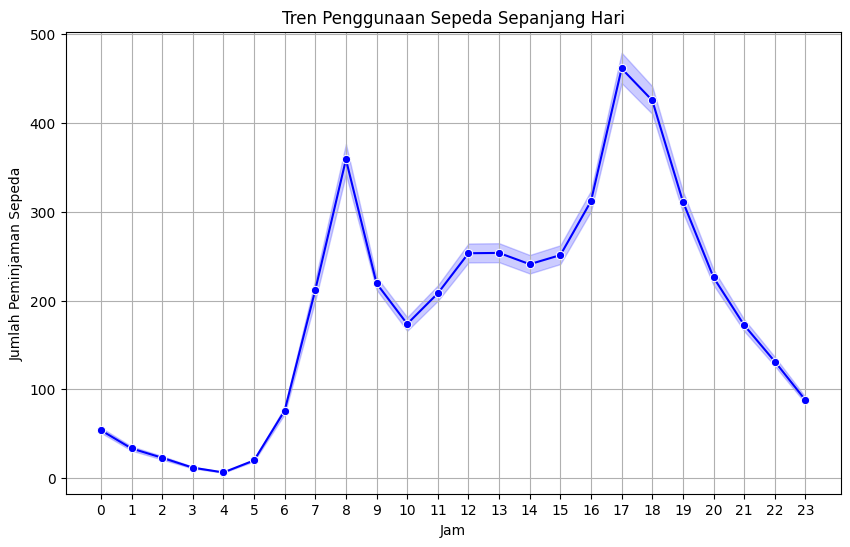

In [65]:
plt.figure(figsize=(10,6))
sns.lineplot(x='hr', y='cnt', data=hour_df, marker='o', color='blue')
plt.title("Tren Penggunaan Sepeda Sepanjang Hari")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Pertanyaan 2:

**Bar Plot** untuk memvisualisasikan pengaruh musim terhadap peminjaman sepeda

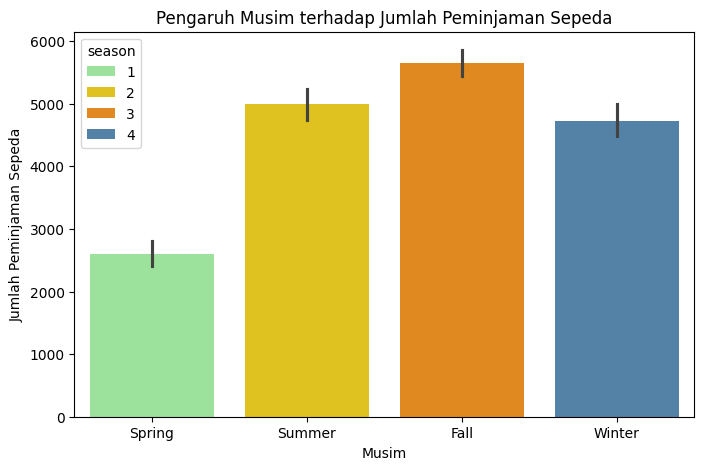

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='cnt', data=day_df, hue = 'season', palette=['#90EE90', '#FFD700', '#FF8C00', '#4682B4'])
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Pengaruh Musim terhadap Jumlah Peminjaman Sepeda")
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

****

**Clustered Bar Plot** untuk memvisualisasikan pengaruh cuaca terhadap peminjaman sepeda yang dikelompokkan berdasarkan musim, untuk mendukung kesimpulan data pengaruh musim terhadap jumlah peminjaman sepeda.

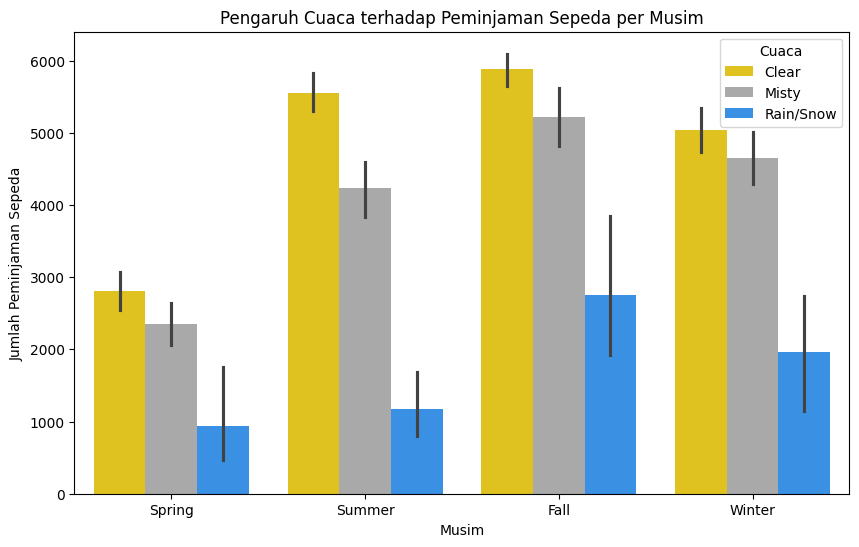

In [82]:
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='cnt', hue='weathersit', data=day_df, palette=['#FFD700', '#A9A9A9', '#1E90FF'])
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda per Musim")
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])

handles, labels = plt.gca().get_legend_handles_labels()
weather_labels = {1: "Clear", 2: "Misty", 3: "Rain/Snow"}
plt.legend(handles, [weather_labels[int(l)] for l in labels], title="Cuaca")
plt.show()

plt.show()

**Scatter Plot** untuk memvisualisasikan hubungan antara suhu dan jumlah peminjaman sepeda

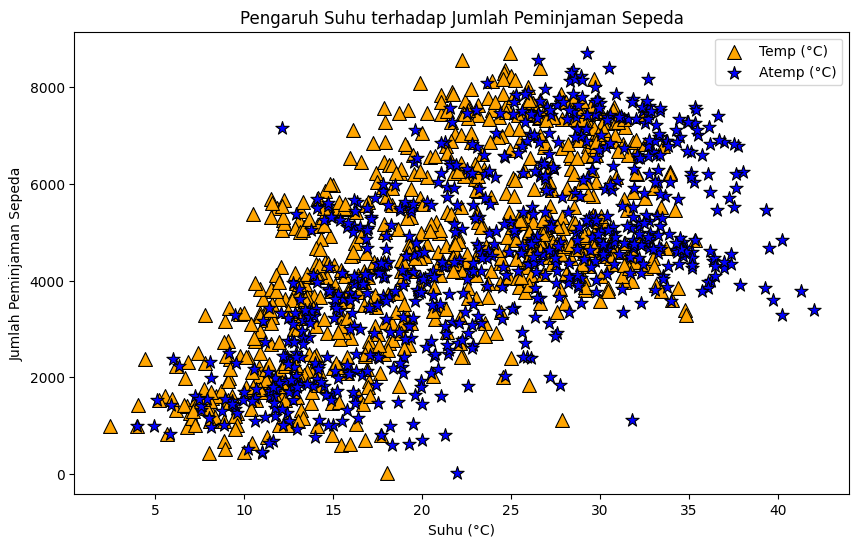

In [85]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='cnt', data=day_df_inverse_norm, marker='^', label='Temp (°C)', color='orange', s=100, edgecolor='black')
sns.scatterplot(x='atemp', y='cnt', data=day_df_inverse_norm, marker='*', label='Atemp (°C)', color='blue', s=100, edgecolor='black')

plt.xlabel("Suhu (°C)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda")
plt.legend()
plt.show()

**Insight:**
- Pertanyaan 1:
  - Dari hasil visualisasi dengan `line plot`, kita dapat melihat lebih jelas bahwa terjadi peningkatan jumlah peminjaman sepeda yang signifikan pada jam-jam sibuk, terutama pada saat jam masuk kerja (pukul 6-8) dan jam pulang kerja (16-18).
- Pertanyaan 2:
  - Dari hasil visualisasi `bar plot`, kita dapat melihat bahwa faktor musim berpengaruh terhadap peningkatan/penurunan jumlah peminjaman sepeda, di mana musim gugur memiliki jumlah peminjaman yang tertinggi, sedangkan musim semi memiliki jumlah peminjaman yang terendah.
  - Dari hasil visualisasi `clustered bar plot`, kita dapat melihat bahwa faktor cuaca sangat berpengaruh terhadap peningkatan/penurunan jumlah peminjaman sepeda, di mana cuaca cerah selalu memiliki jumlah peminjaman sepeda yang tertinggi di semua musim.
  - Dari hasil visualisasi `scatter plot`, kita dapat melihat bahwa faktor suhu juga memiliki korelasi positif terhadap peningkatan jumlah peminjaman sepeda, di mana suhu yang lebih tinggi cenderung memiliki jumlah peminjaman sepeda yang lebih tinggi juga.

## Analisis Lanjutan (Opsional)

In [29]:
# Clustering Jam Sibuk dengan Binning
df_categorized = hour_df_cleaned.copy()

df_categorized['hour_cluster'] = pd.cut(
    df_categorized['cnt'],
    bins=[0, 150, 300, float('inf')],
    labels=["Jam Sepi", "Jam Normal", "Jam Sibuk"]
)

df_categorized.sample(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hour_cluster
11150,11151,2012-04-14,2,1,4,19,0,6,0,2,0.60,0.6212,0.40,0.1642,163,296,459,Jam Sibuk
3740,3741,2011-06-09,2,0,6,18,0,4,1,1,0.88,0.8030,0.39,0.2836,52,414,466,Jam Sibuk
15266,15267,2012-10-03,4,1,10,7,0,3,1,2,0.60,0.5152,0.94,0.1940,11,504,515,Jam Sibuk
9057,9058,2012-01-18,1,1,1,7,0,3,1,1,0.32,0.2879,0.42,0.3582,1,262,263,Jam Normal
7476,7477,2011-11-13,4,0,11,3,0,0,0,2,0.36,0.3485,0.62,0.1343,8,20,28,Jam Sepi
7345,7346,2011-11-07,4,0,11,16,0,1,1,1,0.52,0.5000,0.45,0.0000,40,255,295,Jam Normal
14590,14591,2012-09-05,3,1,9,3,0,3,1,1,0.70,0.6667,0.79,0.2836,0,4,4,Jam Sepi
658,659,2011-01-30,1,0,1,18,0,0,0,1,0.26,0.2576,0.65,0.1642,8,57,65,Jam Sepi
8888,8889,2012-01-11,1,1,1,5,0,3,1,1,0.20,0.2121,0.80,0.1343,0,22,22,Jam Sepi
5177,5178,2011-08-08,3,0,8,15,0,1,1,1,0.84,0.7576,0.41,0.2985,40,86,126,Jam Sepi


## Conclusion

- Conclution pertanyaan 1:

  Dari data rata-rata peminjaman sepeda di setiap jam sepanjang hari, kita dapat menyimpulkan bahwa tren peminjaman sepeda cenderung meningkat pada jam-jam sibuk, antara lain:
  - Jam pulang kerja (pukul 16-18) yang sesuai dengan realita, di mana mobilitas harian rata-rata tertinggi pada jam-jam ini.
  - Jam masuk kerja (pukul 6-8), di mana beberapa orang mungkin menggunakan sepeda untuk berangkat ke kantor.
  - Jam makan siang (pukul 11-13) yang juga masuk akal karena beberapa orang mungkin menggunakan sepeda untuk pergi makan siang di luar.


- Conclution pertanyaan 2:

  Dari data rata-rata peminjaman sepeda di setiap musimnya, kita dapat menyimpulkan bahwa:
  - Tren peminjaman sepeda terendah saat musim semi. Hal ini terjadi karena musim semi memiliki rata-rata temperatur yang paling dingin di antara musim-musim lain, meskipun cuacanya sering cerah.
  - Tren peminjaman sepeda tertinggi saat musim gugur. Hal ini disebabkan karena musim gugur memiliki rata-rata termperatur yang paling hangat di antara musim-musim lain, dan cuacanya yang sering cerah juga mendukung kesimpulan data di atas.